In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline

(100, 1) <type 'numpy.ndarray'>
(100,) <type 'numpy.ndarray'>


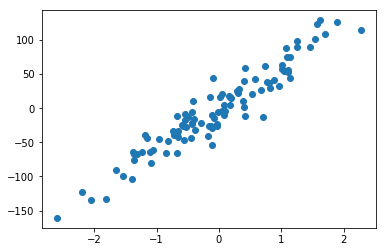

In [6]:
X, y = make_regression(n_samples=100, noise=20, n_features=1)
plt.scatter(X, y)
print X.shape, type(X)
print y.shape, type(y)

In [27]:
ones = np.ones(X.shape[0])
A = np.insert(X, 0, 1, axis=1)
print A.shape, type(A)
print A

(100, 2) <type 'numpy.ndarray'>
[[ 1.          0.18143068]
 [ 1.          1.61587304]
 [ 1.          0.68127523]
 [ 1.          0.05463222]
 [ 1.         -1.39932032]
 [ 1.         -0.29332412]
 [ 1.          1.08397663]
 [ 1.          0.31483196]
 [ 1.          0.41866837]
 [ 1.         -0.03478114]
 [ 1.         -2.19485209]
 [ 1.         -2.59115845]
 [ 1.         -0.02653595]
 [ 1.         -0.54891467]
 [ 1.         -0.43314581]
 [ 1.          0.29000126]
 [ 1.          0.16691773]
 [ 1.          1.03667626]
 [ 1.          1.07830803]
 [ 1.          0.53642711]
 [ 1.         -1.04946261]
 [ 1.         -0.54568151]
 [ 1.         -0.84567631]
 [ 1.          0.17127962]
 [ 1.         -1.65456936]
 [ 1.          0.810077  ]
 [ 1.         -0.52932409]
 [ 1.         -0.08513009]
 [ 1.         -1.18527202]
 [ 1.         -0.11497532]
 [ 1.          1.10222526]
 [ 1.          0.30441797]
 [ 1.          0.88875598]
 [ 1.         -0.57803309]
 [ 1.         -0.65105934]
 [ 1.          1.570348

In [18]:
b = y.reshape(-1, 1)
print b.shape, type(b)

(100, 1) <type 'numpy.ndarray'>


最小二乘法是一种求解释一种基于均方误差来求解的一种方法，在线性回归中，最小二乘法就是试图找到一条直线，使所有的样本到直线上的欧式距离最小

Ax=b
A
x
b
ATAx=ATb
A
T
A
x
A
T
b
则

x=(ATA)−1ATb

In [24]:
# np.linalg.inv: array inverse
x = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), b)
print x.shape, x

(2, 1) [[ 0.47170879]
 [59.0974545 ]]


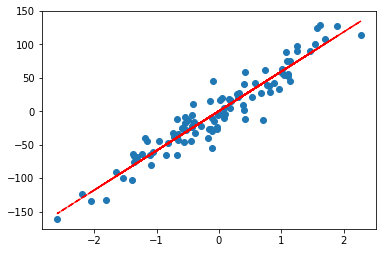

In [26]:
plt.scatter(X,y)
y_pred = np.dot(A, x)
plt.plot(X, y_pred, 'r--')

梯度下降法

In [52]:
class LinearRegression(object):
    def __init__(self):
        pass
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        y = y.reshape(-1,1)
        self.w = np.random.randn(X.shape[1], 1)
        
        for _ in range(50):
            y_pred = np.dot(X, self.w)
            mse = np.mean(0.5*(y_pred-y)**2)
            grad_w = np.dot(X.T, (y_pred-y))
            self.w -= 0.01 *grad_w
            print (_, mse, self.w[0][0], self.w[1][0])
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return np.dot(X, self.w)

In [53]:
lr = LinearRegression()
lr.fit(X, y)

(0, 1847.6032956549645, -2.8122859732137337, 54.62345072191395)
(1, 179.38687890448608, 0.2271610583698358, 58.570765981388334)
(2, 165.7167618775377, 0.4429201520945729, 59.04321613519357)
(3, 165.56764894477408, 0.4687441388588582, 59.09167197970258)
(4, 165.56598202209582, 0.4713927211001271, 59.09684372414117)
(5, 165.56596335462226, 0.4716754071334649, 59.09738982643928)
(6, 165.5659631455432, 0.4717052569248264, 59.097447655956906)
(7, 165.56596314320143, 0.47170841786928963, 59.09745377515529)
(8, 165.56596314317522, 0.4717087523428755, 59.097454422786356)
(9, 165.56596314317497, 0.4717087877421997, 59.09745449132528)
(10, 165.56596314317497, 0.4717087914885179, 59.09745449857887)
(11, 165.5659631431749, 0.47170879188499615, 59.097454499346526)
(12, 165.56596314317497, 0.4717087919269588, 59.09745449942777)
(13, 165.56596314317497, 0.47170879193139803, 59.09745449943637)
(14, 165.565963143175, 0.4717087919318691, 59.097454499437276)
(15, 165.56596314317497, 0.47170879193191656, 

In [54]:
y_pred = lr.predict(X)

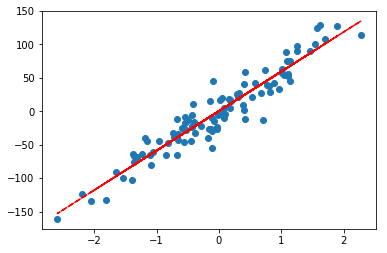

In [55]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r--')